# Phase 3 Final Project

* Kevin Gross
* Part Time Flatiron Student

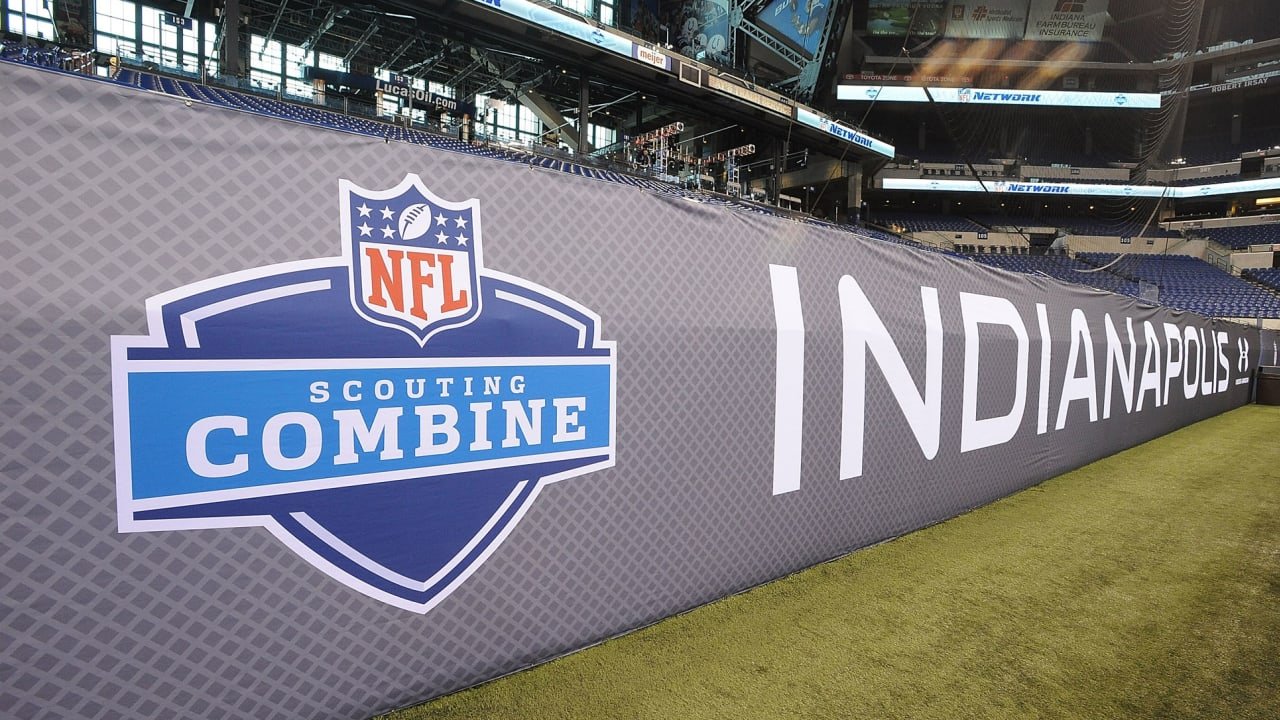

## NFL Combine Data Analysis

### General Overview

This project analyzes data from the NFL Scounting Combine from 2009 to 2019.

The NFL Scouting Combine is a week-long showcase occurring every February at Lucas Oil Stadium in Indianapolis, where college football players perform physical and mental tests in front of National Football League coaches, general managers, and scouts. With increasing interest in the NFL Draft, the scouting combine has grown in scope and significance, allowing personnel directors to evaluate upcoming prospects in a standardized setting.

Athletes attend by invitation only. An athlete's performance during the combine can affect their draft status and salary, and ultimately their career. The draft has popularized the term "workout warrior", whereby an athlete's "draft stock" is increased based on superior measurable qualities such as size, speed, and strength, despite having an average or sub-par college career.

### Buisness Problem

**The stakeholders for this project are all 32 of the teams in the National Football League.** The analysis provided below can help guide NFL teams to make better decisions at the draft based purely on measureable stats.

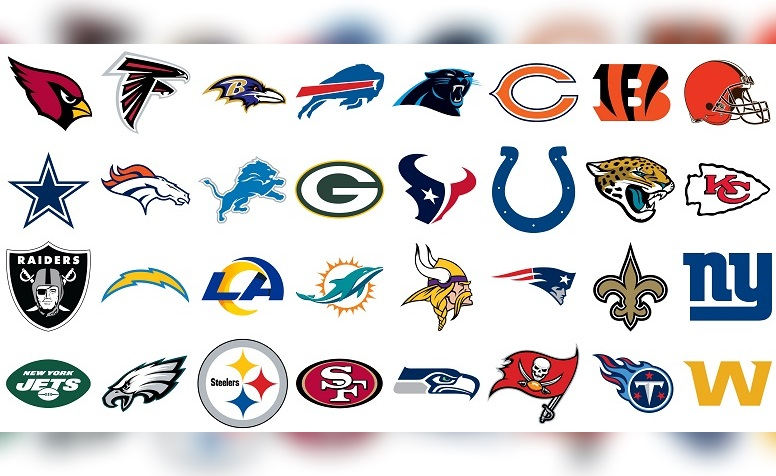

## Import the Necessary Packages and Load The Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, log_loss, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Data/NFL.csv')

In [3]:
display(df.head())
print(df.shape)

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


(3477, 18)


#### Right off the bat, we can see that we have almost 3,500 rows, each with 17 feature columns and 1 target column:

* `Year`: Year of attendance at the NFL combine
* `Player`: Player name
* `Age`: Players age (years)
* `School`: College attended
* `Height`: Height (meters)
* `Weight`: Weight (kilograms)
* `Sprint_40yd`: 40 yard sprint time (seconds)
* `Vertical_Jump`: Vertical jump result (centimeters) 
* `Bench_Press_Reps`: Maximum bench press repetitions achieved while lifting 102.1 kg (225 lb) weight
* `Broad_Jump`: Broad jump result (centimeters)
* `Agility_3cone`: Three-cone agility test time (seconds)
* `Shuttle`: Lateral shuttle time (seconds)
* `Drafted..tm.rnd.yr.`: Team the athlete was drafted by, draft round, draft pick, and year
* `BMI`: Body mass index (kg/m2)
* `Player_Type`: Offensive or defensive player or special teams
* `Position_Type`: Broad classification of the athlete's playing position
* `Position`: Playing position
* `Drafted`: Was the player drafted during the NFL draft?

This is a fairly balanced dataset, with 65% of the combine attendees drafted and 35% not drafted.

In [4]:
print("Raw Counts")
print(df['Drafted'].value_counts())
print()
print("Percentages")
print(df['Drafted'].value_counts(normalize=True))

Raw Counts
Yes    2254
No     1223
Name: Drafted, dtype: int64

Percentages
Yes    0.64826
No     0.35174
Name: Drafted, dtype: float64


#### Thus, a baseline model that always chose the majority class (in this case that a player was drafted) would have an accuracy of 64.8%. 

## Modeling

We are going to try multiple iterations of models in order to maximize our accuracy.

### Logistic Regression - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

### K-Nearest Neighbors - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

This algorithm — unlike linear models or tree-based models — does not emphasize learning the relationship between the features and the target. Instead, for a given test record, it finds the most similar records in the training set and returns an average of their target values.

### Decision Trees - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Similar to linear models (and unlike kNN), this algorithm emphasizes learning the relationship between the features and the target. However, unlike a linear model that tries to find linear relationships between each of the features and the target, decision trees look for ways to split the data based on features to decrease the entropy of the target in each split.

### Random Forest - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

## Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  2927 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2254 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

In [6]:
# Check for missing values
df.isna().sum()

Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

We can see here that we are missing a good amount of records for a few important columns. However, off the bat we can drop the `Drafted..tm.rnd.yr.` column because it is irrelevant for our model. We can also drop `Position_Type` because this is the same information as `Position` except contains less detail. We can also drop `Player` as we do not care about the player's name.

In [7]:
df.drop(columns=['Drafted..tm.rnd.yr.', 'Position_Type', 'Player'], axis=1, inplace=True)

In [8]:
# Confirm that the columns were dropped
df.isna().sum()

Year                   0
Age                  550
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position               0
Drafted                0
dtype: int64

Next, let's try to fill in the 550 missing values in the `Age` column.

In [9]:
df['Age'].describe()

count    2927.000000
mean       21.983259
std         0.969490
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: Age, dtype: float64

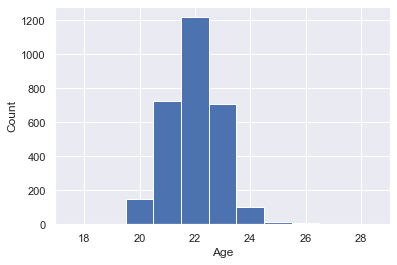

In [10]:
sns.set(style="darkgrid")

sns.histplot(data=df, x="Age", discrete=True, alpha=1.0);

Since age appears to have a Gaussian distribution, let's fill in the blank age ranges using a normal distribution.

In [11]:
# Set a random seed for reproducibility
np.random.seed(8)

# Pull out the index of every row that has NA for 'Age'
index = df[df['Age'].isna()].index

# Use a normal distribution to get random ages based around the mean and standard deviation
value = np.random.normal(loc=df['Age'].mean(), scale=df['Age'].std(), size=df['Age'].isna().sum())

# Round to the nearest whole number
value = value.round(0)

# Fill in the missing indicies using our randomly generated values
df['Age'].fillna(pd.Series(value, index=index), inplace=True)

In [12]:
df['Age'].describe()

count    3477.000000
mean       21.985045
std         0.980128
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: Age, dtype: float64

In [13]:
# Confirm that it worked
df.isna().sum()

Year                   0
Age                    0
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position               0
Drafted                0
dtype: int64

We still have missing values for 6 other columns: `Sprint_40yd`, `Vertical_Jump`, `Bench_Press_Reps`, `Broad_Jump`, `Agility_3cone`, and `Shuttle`. Let's look at the distribution of these below.

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


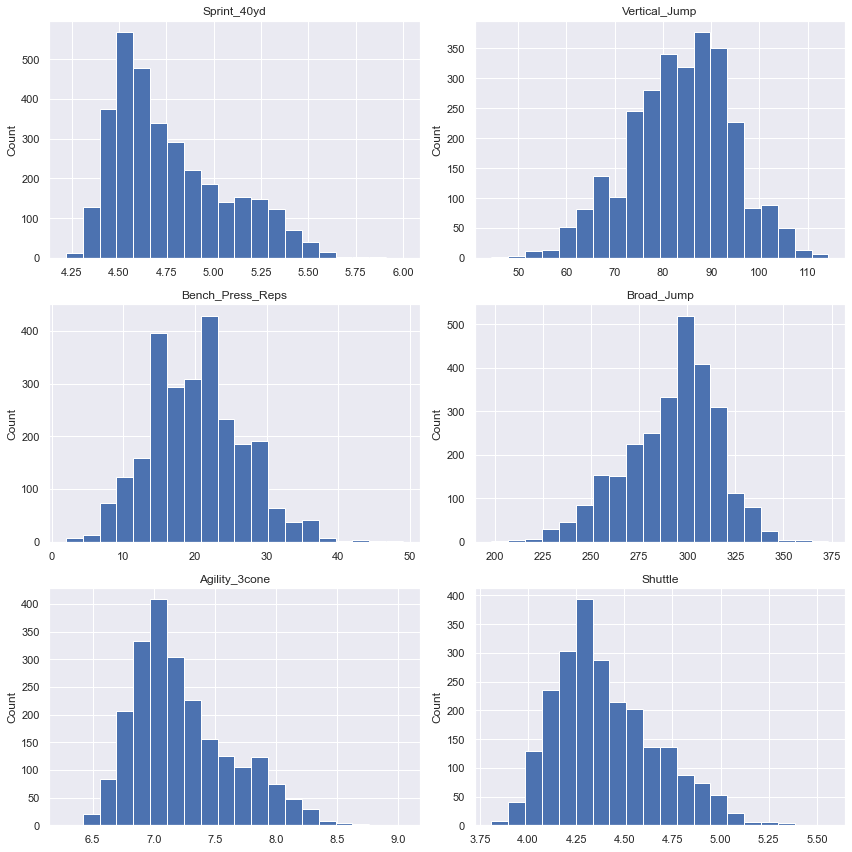

In [14]:
# Create figure and set figure size and attributes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.set_tight_layout(True)

# Iterate through variables with a for loop and make one histogram plot for each one
for index, col in enumerate(df.columns[5:11]):
    ax = axes[index//2][index%2]
    ax.hist(df[col], bins=20)
    ax.set_ylabel('Count')
    
    #Set column name as title
    ax.set_title(col)

As we can see above, none of these graphs appear to have a normal distribution. This can be attributed to the fact that each position will have very different sized men, which means they were perform each task at varying levels. For example, a wide receiver is going to be much faster at the `Sprint_40yrd` than an offensive lineman.

In [15]:
wide_receivers = df[df['Position'] == 'WR']
offensive_tackle = df[df['Position'] == 'OT']

print('Wide Receiver 40 Yard Dash Times:')
print(wide_receivers['Sprint_40yd'].describe())
print('\n')
print('Offensive Tackle 40 Yard Dash Times:')
print(offensive_tackle['Sprint_40yd'].describe())

Wide Receiver 40 Yard Dash Times:
count    480.000000
mean       4.503646
std        0.097032
min        4.220000
25%        4.430000
50%        4.510000
75%        4.562500
max        4.850000
Name: Sprint_40yd, dtype: float64


Offensive Tackle 40 Yard Dash Times:
count    258.000000
mean       5.226628
std        0.177057
min        4.710000
25%        5.125000
50%        5.220000
75%        5.337500
max        5.850000
Name: Sprint_40yd, dtype: float64


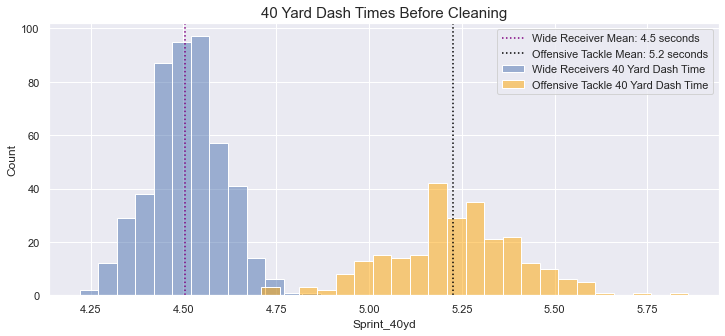

In [16]:
fig, axes = plt.subplots(figsize=(12,5))

sns.histplot(data=wide_receivers['Sprint_40yd'], alpha=0.5, binwidth=.05, 
             label='Wide Receivers 40 Yard Dash Time')
sns.histplot(data=offensive_tackle['Sprint_40yd'], alpha=0.5, color='orange', 
             binwidth=.05, label='Offensive Tackle 40 Yard Dash Time')

plt.axvline(x=np.mean(wide_receivers['Sprint_40yd']), color='purple',  linestyle=':', 
            label='Wide Receiver Mean: 4.5 seconds')
plt.axvline(x=np.mean(offensive_tackle['Sprint_40yd']), color='black', linestyle=':',
           label= 'Offensive Tackle Mean: 5.2 seconds')
plt.title('40 Yard Dash Times Before Cleaning', size=15)
plt.legend();

### Adding Missing Data

Looking at this data above, it confirms that we need to be very careful about how we input the missing data. Luckily, Scikit-Learn has a tool called **Iterative Imputer** that we can implment for this type of situation. From SciKit Learn's docstring:

> "Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion."

Let's pull out the columns that are missing data and fit and transform those columns using the Iterative Imputer.

In [17]:
missing = df[['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle']]
missing

,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,4.38,85.09,25.0,325.12,NaN,NaN
1,4.84,83.82,27.0,292.10,7.38,4.45
2,5.50,NaN,21.0,NaN,NaN,NaN
3,4.49,93.98,15.0,304.80,7.09,4.23
4,4.76,92.71,26.0,304.80,7.10,4.40
...,...,...,...,...,...,...
3472,4.48,95.25,11.0,NaN,NaN,NaN
3473,4.51,100.33,13.0,325.12,NaN,NaN
3474,4.47,100.33,15.0,342.90,6.82,4.14
3475,4.51,82.55,18.0,292.10,7.21,4.19


In [18]:
# Instatiate IterativeImputer
iter_imp = IterativeImputer(random_state=8)

# Fit it on our data
iter_imp.fit(missing)

# Transform our data
missing = iter_imp.transform(missing)

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [19]:
# Round to the nearest 2 decimal places
missing = pd.DataFrame(missing, columns=['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle']).round(2)

In [20]:
# Drop the columns that were missing the data from our dataset
df.drop(columns=['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle'], axis=1, inplace=True)

In [21]:
# Add the newly created missing data
cleaned_df = pd.concat([df, missing], axis=1)
cleaned_df.head()

,Year,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,2009,20.0,Ohio St.,1.8542,106.594207,31.004194,offense,RB,Yes,4.38,85.09,25.0,325.12,6.88,4.17
1,2009,22.0,Illinois,1.8796,118.387609,33.510073,defense,DE,Yes,4.84,83.82,27.0,292.10,7.38,4.45
2,2009,24.0,LSU,2.0066,165.107623,41.005821,offense,OG,Yes,5.50,62.50,21.0,243.23,7.97,4.88
3,2009,23.0,Alabama,1.8034,92.079251,28.312463,defense,FS,Yes,4.49,93.98,15.0,304.80,7.09,4.23
4,2009,22.0,Connecticut,1.8796,110.676538,31.327425,defense,OLB,Yes,4.76,92.71,26.0,304.80,7.10,4.40


In [22]:
# Confirm that it worked
cleaned_df.isna().sum()

Year                0
Age                 0
School              0
Height              0
Weight              0
BMI                 0
Player_Type         0
Position            0
Drafted             0
Sprint_40yd         0
Vertical_Jump       0
Bench_Press_Reps    0
Broad_Jump          0
Agility_3cone       0
Shuttle             0
dtype: int64

In [23]:
clean_wide_receivers = cleaned_df[cleaned_df['Position'] == 'WR']
clean_offensive_tackle = cleaned_df[cleaned_df['Position'] == 'OT']

print('Wide Receiver 40 Yard Dash Times After Cleaning:')
print(clean_wide_receivers['Sprint_40yd'].describe())
print('\n')
print('Offensive Tackle 40 Yard Dash Times After Cleaning:')
print(clean_offensive_tackle['Sprint_40yd'].describe())

Wide Receiver 40 Yard Dash Times After Cleaning:
count    506.000000
mean       4.512115
std        0.105991
min        4.220000
25%        4.440000
50%        4.510000
75%        4.577500
max        4.850000
Name: Sprint_40yd, dtype: float64


Offensive Tackle 40 Yard Dash Times After Cleaning:
count    278.000000
mean       5.207014
std        0.189916
min        4.710000
25%        5.090000
50%        5.210000
75%        5.320000
max        5.850000
Name: Sprint_40yd, dtype: float64


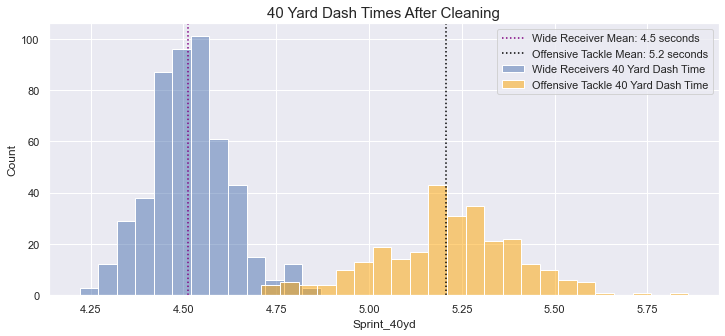

In [24]:
fig, axes = plt.subplots(figsize=(12,5))

sns.histplot(data=clean_wide_receivers['Sprint_40yd'], alpha=0.5, binwidth=.05, 
             label='Wide Receivers 40 Yard Dash Time')
sns.histplot(data=clean_offensive_tackle['Sprint_40yd'], alpha=0.5, color='orange', 
             binwidth=.05, label='Offensive Tackle 40 Yard Dash Time')

plt.axvline(x=np.mean(clean_wide_receivers['Sprint_40yd']), color='purple',  linestyle=':', 
            label='Wide Receiver Mean: 4.5 seconds')
plt.axvline(x=np.mean(clean_offensive_tackle['Sprint_40yd']), color='black', linestyle=':',
           label= 'Offensive Tackle Mean: 5.2 seconds')
plt.title('40 Yard Dash Times After Cleaning', size=15)
plt.legend();

As we can see above, the Iterative Imputer worked! It did a good job of understanding that position type will significantly affect how fast of a 40 yard dash someone can run.

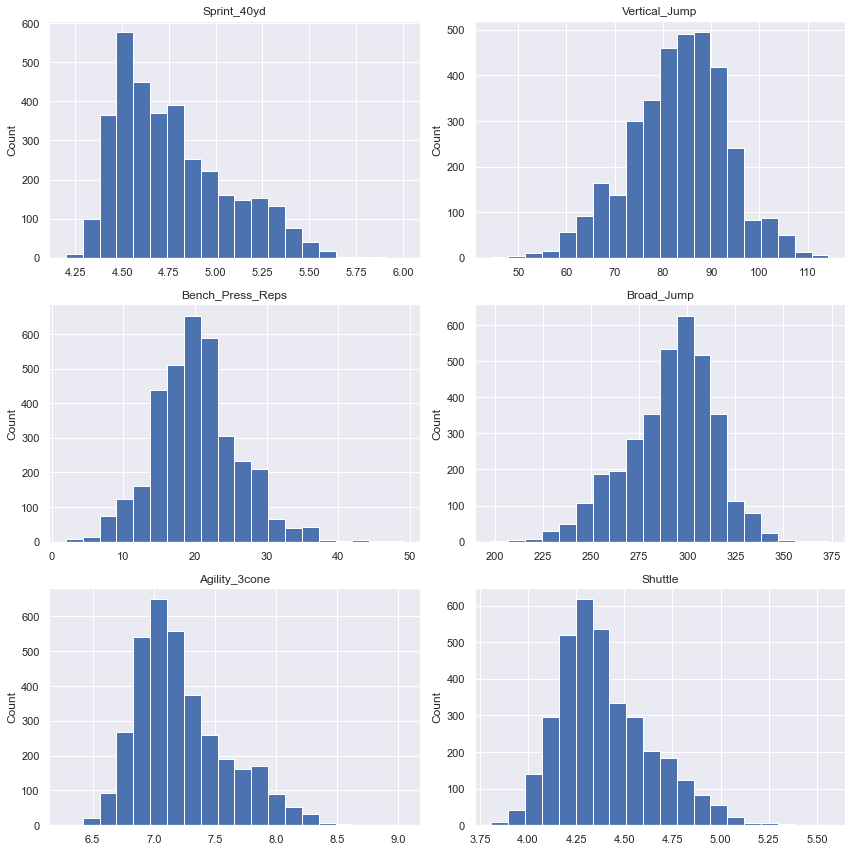

In [25]:
# Create figure and set figure size and attributes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.set_tight_layout(True)

# Iterate through variables with a for loop and make one histogram plot for each one
for index, col in enumerate(cleaned_df.columns[9:]):
    ax = axes[index//2][index%2]
    ax.hist(cleaned_df[col], bins=20)
    ax.set_ylabel('Count')
    
    #Set column name as title
    ax.set_title(col)

Above we can see that the distribution of our data did not seemingly change with Iterative Imputer.

In [26]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3477 non-null   int64  
 1   Age               3477 non-null   float64
 2   School            3477 non-null   object 
 3   Height            3477 non-null   float64
 4   Weight            3477 non-null   float64
 5   BMI               3477 non-null   float64
 6   Player_Type       3477 non-null   object 
 7   Position          3477 non-null   object 
 8   Drafted           3477 non-null   object 
 9   Sprint_40yd       3477 non-null   float64
 10  Vertical_Jump     3477 non-null   float64
 11  Bench_Press_Reps  3477 non-null   float64
 12  Broad_Jump        3477 non-null   float64
 13  Agility_3cone     3477 non-null   float64
 14  Shuttle           3477 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 407.6+ KB


We are almost there! Next we need to change the `School`, `Position`, and `Drafted` columns into one-hot numeric arrays.

In [27]:
cleaned_df = pd.get_dummies(cleaned_df, drop_first=True)

cleaned_df.head()

,Year,Age,Height,Weight,BMI,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,...,Position_OLB,Position_OT,Position_P,Position_QB,Position_RB,Position_S,Position_SS,Position_TE,Position_WR,Drafted_Yes
0,2009,20.0,1.8542,106.594207,31.004194,4.38,85.09,25.0,325.12,6.88,...,0,0,0,0,1,0,0,0,0,1
1,2009,22.0,1.8796,118.387609,33.510073,4.84,83.82,27.0,292.10,7.38,...,0,0,0,0,0,0,0,0,0,1
2,2009,24.0,2.0066,165.107623,41.005821,5.50,62.50,21.0,243.23,7.97,...,0,0,0,0,0,0,0,0,0,1
3,2009,23.0,1.8034,92.079251,28.312463,4.49,93.98,15.0,304.80,7.09,...,0,0,0,0,0,0,0,0,0,1
4,2009,22.0,1.8796,110.676538,31.327425,4.76,92.71,26.0,304.80,7.10,...,1,0,0,0,0,0,0,0,0,1


In [28]:
# Save our cleaned dataset for later
cleaned_df.to_csv('Data/clean_combine_data.csv', encoding='utf8')

# Modeling

Now that we have a cleaned dataframe (`cleaned_df`), we can go ahead and start creating our models that can predict whether or not a player was drafted. The steps we are going to follow are below:

### 1. Prepare the Data for Modeling
For a complete end-to-end ML process, we need to create a holdout set that we will use at the end to evaluate our model's performance. We can do this by using `train-test-split`. Additionally we will want to us `StandardScaler` on our `X_train`.
### 2. Build and Evaluate a Baseline Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla logistic regression model using log loss and `cross_val_score`.
### 3. Build and Evaluate Additional Logistic Regression Models
Build multiple logistic regression models with different hyperparameters in order to minimize log loss.
### 4. Build a Baseline kNN Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla kNN regression model using log loss and `cross_val_score`.
### 5. Build Iterative Models to Find the Best kNN Model
Build multiple kNN regression models with different hyperparameters in order to minimize log loss.
### 6. Build a Baseline Decision Tree Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla Decision Tree regression model using log loss and `cross_val_score`.
### 7. Build Iterative Models to Find the Best Decision Tree Model
Build multiple Decision Tree regression models with different hyperparameters in order to minimize log loss.
### 8. Build a Baseline Random Forest Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla Random Forest regression model using log loss and `cross_val_score`.
### 9. Build Iterative Models to Find the Best Random Forest Model
Build multiple Random Forest regression models with different hyperparameters in order to minimize log loss.
### 10. Choose and Evaluate an Overall Best Model
Preprocess the full training set and test set appropriately, then evaluate the final model with various classification metrics in addition to log loss.

## 1. Prepare the Data for Modeling
In the cell below, we will use the variable `cleaned_df` in order to create X and y, then training and test sets using `train_test_split` [(documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). We will use a `random_state` of 8 to ensure repeatability.

In [29]:
# Split df into X and y
X = cleaned_df.drop(columns='Drafted_Yes', axis=1)
y = cleaned_df['Drafted_Yes']

# Perform train-test split with random_state=8
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

Let's take a look to see if we have roughly equal percentages of drafted vs. not drafted in our train vs. test targets:

In [30]:
print("Train percent drafted vs. undrafted:", y_train.value_counts(normalize=True)[1])
print("Test percent drafted vs undrafted: ", y_test.value_counts(normalize=True)[1])

Train percent drafted vs. undrafted: 0.650939777522056
Test percent drafted vs undrafted:  0.6402298850574712


Now, we are going to instantiate a `StandardScaler`, fit it on `X_train`, and create new variables `X_train_scaled` and `X_test_scaled` containing values transformed with the scaler.

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Build and Evaluate a Baseline Model
Using scikit-learn's `LogisticRegression` model, we will instantiate a classifier with `random_state=8`. We will then fit our model using `scoring="accuracy"` on `X_train` and `y_train`.

* [`LogisticRegression` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Accuracy is the best way to score our model here for a few reasons:

* Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.
* Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

In our case, we want to correctly distinguish true positives (our model predicted the player was drafted and the player was actually drafted) and true negatives (our model prediced the player was not drafted and the player was actually not drafted). Additionally, our class distribution is mildly imbalanced (35% vs 65%).

In [133]:
# Instantiate a LogisticRegression with random_state=8
baseline_model = LogisticRegression(random_state=8)

# Fit our vanilla model
baseline_model.fit(X_train_scaled, y_train)

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=8)

The `print_metrics` function below will be used throughout our notebook to help determine how well our model performs. Mostly, we are going to be concerned with the `Testing Accuracy`.

In [131]:
# Create a function that can show how our models do throughout the notebook
def print_metrics(model, X_train, y_train, X_test, y_test):
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)    
    
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('\n')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('\n')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('\n')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))
    
    print('\n')
    print('Classification Report:', '\n', classification_report(y_test, y_hat_test))
    
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(model)
    plt.show()

Training Precision:  0.7588652482269503
Testing Precision:  0.7008797653958945


Training Recall:  0.882734236888627
Testing Recall:  0.8581687612208259


Training Accuracy:  0.7410817031070196
Testing Accuracy:  0.674712643678161


Training F1-Score:  0.816126396077363
Testing F1-Score:  0.771589991928975


Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.35      0.44       313
           1       0.70      0.86      0.77       557

    accuracy                           0.67       870
   macro avg       0.64      0.60      0.60       870
weighted avg       0.66      0.67      0.65       870



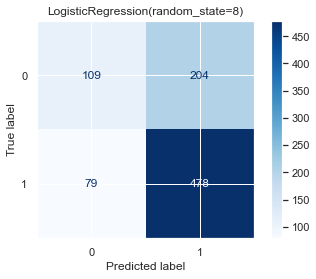

In [105]:
print_metrics(baseline_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [134]:
def create_grid(model, X_test, y_test, model_name=None):
    
    y_hat_test = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_hat_test)
    pre = precision_score(y_test, y_hat_test)
    rec = recall_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    
    data = [[model_name, acc, pre, rec, f1]]
    
    df = pd.DataFrame(data=data, 
                          columns=['Model Name', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
    
    return df

In [137]:
def add_grid(model, X_test, y_test, dataframe=None, model_name=None):
    
    y_hat_test = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_hat_test)
    pre = precision_score(y_test, y_hat_test)
    rec = recall_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    
    data = [[model_name, acc, pre, rec, f1]]
    
    df = pd.DataFrame(data=data, 
                          columns=['Model Name', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
    
    new_line = dataframe.append(df)
    
    return new_line

In [139]:
baseline_lr = create_grid(baseline_model, X_test_scaled, y_test, model_name='Baseline LogReg')

baseline_lr

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.70088,0.858169,0.77159


To judge how our models are performing, we will look at the testing accuracy score, which in this case is 67.5%. As of now, that is our best model and it does slightly better than just guessing the majority class every time (64.8%).

## 3. Build and Evaluate Additional Logistic Regression Models

Using `GridSearchCV` we are going to see what hyperparameters minimize our log loss. First we are going to try L1 penalties. 

In [140]:
# Definite a log_param_grid
log_L1_param_grid = {'penalty': ['l1'],
                     'solver': ['liblinear', 'saga'],
                     'tol': [0.001, 0.01, 0.1],
                     'max_iter': [1000, 10000],
                     'C': [1, 100, 10000]
                    }

In [141]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(random_state=8)

# Instantiate GridSearchCV
grid_log_l1 = GridSearchCV(log_reg, log_L1_param_grid, scoring='accuracy')

# Fit to the data
grid_log_l1.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=8),
             param_grid={'C': [1, 100, 10000], 'max_iter': [1000, 10000],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga'],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [142]:
# Look at the best parameters from our GridSearchCV
grid_log_l1.best_params_

{'C': 1,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}

In [228]:
# Instantiate a LogisticRegression
log_model_2 = LogisticRegression(penalty='l1', max_iter=1000, C=1, solver='liblinear', tol=0.001, random_state=8)

# Fit our model
log_model_2.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=8,
                   solver='liblinear', tol=0.001)

Training Precision:  0.7597567156614293
Testing Precision:  0.7039764359351989


Training Recall:  0.8833235120801414
Testing Recall:  0.8581687612208259


Training Accuracy:  0.7422324510932106
Testing Accuracy:  0.6781609195402298


Training F1-Score:  0.8168937329700271
Testing F1-Score:  0.7734627831715211


Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.36      0.44       313
           1       0.70      0.86      0.77       557

    accuracy                           0.68       870
   macro avg       0.65      0.61      0.61       870
weighted avg       0.66      0.68      0.66       870



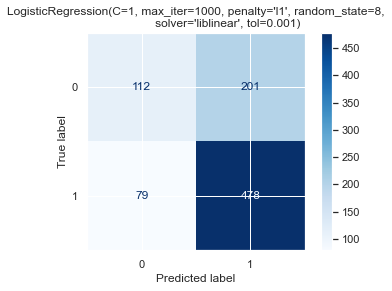

In [229]:
print_metrics(log_model_2, X_train_scaled, y_train, X_test_scaled, y_test)

In [145]:
log_2 = add_grid(log_model_2, X_test_scaled, y_test, dataframe=baseline_lr, model_name='LogReg L1')

log_2

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463


We can see here that we improved our accuracy by ~0.4%. However, it appears that we are overfitting our data since our testing scores are lower than our training scores. 

Next, we are going to try L2 penalties.

In [146]:
# Definite a log_param_grid
log_L2_param_grid = {'penalty': ['l2'],
                     'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
                     'tol': [0.001, 0.01, 0.1],
                     'max_iter': [1000, 10000],
                     'C': [1, 100, 10000]
                    }

In [147]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(random_state=8)

# Instantiate GridSearchCV
grid_log_l2 = GridSearchCV(log_reg, log_L2_param_grid, scoring='accuracy')

# Fit to the data
grid_log_l2.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=8),
             param_grid={'C': [1, 100, 10000], 'max_iter': [1000, 10000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs',
                                    'sag'],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [148]:
# Look at the best parameters from our GridSearchCV
grid_log_l2.best_params_

{'C': 1,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.001}

In [149]:
# Instantiate a LogisticRegression
log_model_3 = LogisticRegression(penalty='l2', max_iter=1000, C=1, solver='liblinear', tol=0.001, random_state=8)

# Fit the model
log_model_3.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=8, solver='liblinear',
                   tol=0.001)

Training Precision:  0.7591277890466531
Testing Precision:  0.7008797653958945


Training Recall:  0.8821449616971125
Testing Recall:  0.8581687612208259


Training Accuracy:  0.7410817031070196
Testing Accuracy:  0.674712643678161


Training F1-Score:  0.8160261651676206
Testing F1-Score:  0.771589991928975


Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.35      0.44       313
           1       0.70      0.86      0.77       557

    accuracy                           0.67       870
   macro avg       0.64      0.60      0.60       870
weighted avg       0.66      0.67      0.65       870



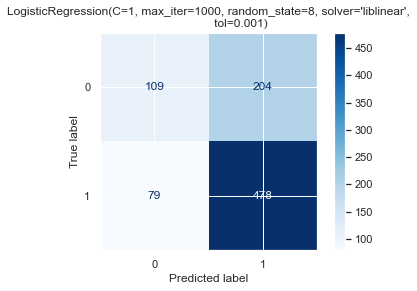

In [150]:
print_metrics(log_model_3, X_train_scaled, y_train, X_test_scaled, y_test)

In [154]:
log_3 = add_grid(log_model_3, X_test_scaled, y_test, dataframe=log_2, model_name='LogReg L2')

log_3

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590


Our accuracy went slightly down using L2 penalities. Fow now we will call Log Reg L1 our best model as it is the most accurate. 

## 4. Build a Baseline kNN Model

In [155]:
# Creating the model
knn_baseline_model = KNeighborsClassifier()

# Fit our model
knn_baseline_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Training Precision:  0.75
Testing Precision:  0.6657142857142857


Training Recall:  0.8962875662934591
Testing Recall:  0.8366247755834829


Training Accuracy:  0.7380130418105102
Testing Accuracy:  0.6264367816091954


Training F1-Score:  0.8166442953020133
Testing F1-Score:  0.7414478918058869


Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.25      0.33       313
           1       0.67      0.84      0.74       557

    accuracy                           0.63       870
   macro avg       0.57      0.54      0.53       870
weighted avg       0.59      0.63      0.59       870



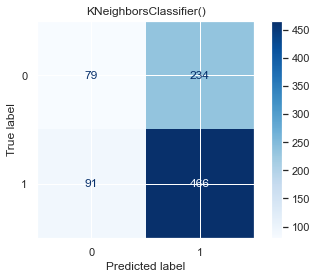

In [156]:
print_metrics(knn_baseline_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [157]:
knn_1 = add_grid(knn_baseline_model, X_test_scaled, y_test, dataframe=log_3, model_name='Baseline KNN')

knn_1

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448


As we can tell, this baseline kNN model did not do as well as the baseline logistic regression model nor the logistic regression model with hypertuning. Maybe if we apply some tuning to it, we will be able to beat the logistic regression model. We also still appear to be overfitting.

## 5. Build Iterative Models to Find the Best kNN Model

In [158]:
# Definite a kNN_param_grid
kNN_param_grid = {'n_neighbors': [1, 5, 50, 100],
                     'metric': ['minkowski', 'manhattan', 'euclidean'],
                     'weights': ['uniform', 'distance'],
                     'leaf_size': [5, 10, 30],
                    }

In [159]:
# Instantiate Logistic Regression
kNN_reg = KNeighborsClassifier()

# Instantiate GridSearchCV
kNN_grid = GridSearchCV(kNN_reg, kNN_param_grid, scoring='accuracy')

# Fit to the data
kNN_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 30],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 5, 50, 100],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [160]:
# Look at the best parameters from our GridSearchCV
kNN_grid.best_params_

{'leaf_size': 5,
 'metric': 'manhattan',
 'n_neighbors': 50,
 'weights': 'uniform'}

In [161]:
# Instatiate a model with the best parameters
knn_model_2 = KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=50, weights='uniform')

# Fit the model on our data
knn_model_2.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=50)

Training Precision:  0.6662669864108713
Testing Precision:  0.6508313539192399


Training Recall:  0.9823217442545669
Testing Recall:  0.9838420107719928


Training Accuracy:  0.6682009973149213
Testing Accuracy:  0.6517241379310345


Training F1-Score:  0.7939985710883545
Testing F1-Score:  0.7834167262330236


Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.06      0.11       313
           1       0.65      0.98      0.78       557

    accuracy                           0.65       870
   macro avg       0.66      0.52      0.45       870
weighted avg       0.66      0.65      0.54       870



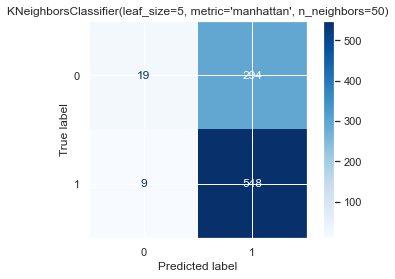

In [162]:
print_metrics(knn_model_2, X_train_scaled, y_train, X_test_scaled, y_test)

In [164]:
knn_2 = add_grid(knn_model_2, X_test_scaled, y_test, dataframe=knn_1, model_name='KNN Model 2')

knn_2

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417


We can see that we improved our accuracy here but are still not doing as well as our Logistic Regression Models.

In [165]:
# Definite a log_param_grid
kNN_param_grid_2 = {'n_neighbors': [1, 3, 7, 13],
                     'metric': ['minkowski', 'manhattan', 'euclidean'],
                     'weights': ['uniform', 'distance'],
                     'leaf_size': [3, 5, 10]
                    }

In [166]:
# Instantiate Logistic Regression
kNN_reg_2 = KNeighborsClassifier()

# Instantiate GridSearchCV
kNN_grid_2 = GridSearchCV(kNN_reg_2, kNN_param_grid_2, scoring='accuracy')

# Fit to the data
kNN_grid_2.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [3, 5, 10],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 3, 7, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [167]:
# Look at the best parameters from our GridSearchCV
kNN_grid_2.best_params_

{'leaf_size': 3,
 'metric': 'manhattan',
 'n_neighbors': 13,
 'weights': 'uniform'}

In [168]:
# Instatiate a model with the best parameters
knn_model_3 = KNeighborsClassifier(leaf_size=3, metric='manhattan', n_neighbors=13, weights='uniform')

# Fit the model on our data
knn_model_3.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=3, metric='manhattan', n_neighbors=13)

Training Precision:  0.6935483870967742
Testing Precision:  0.6623376623376623


Training Recall:  0.9375368296994696
Testing Recall:  0.9156193895870736


Training Accuracy:  0.6896816263904871
Testing Accuracy:  0.6471264367816092


Training F1-Score:  0.797293911300426
Testing F1-Score:  0.7686510926902788


Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.17      0.26       313
           1       0.66      0.92      0.77       557

    accuracy                           0.65       870
   macro avg       0.60      0.54      0.51       870
weighted avg       0.61      0.65      0.58       870



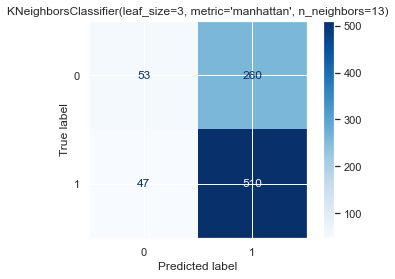

In [169]:
print_metrics(knn_model_3, X_train_scaled, y_train, X_test_scaled, y_test)

In [170]:
knn_3 = add_grid(knn_model_3, X_test_scaled, y_test, dataframe=knn_2, model_name='KNN Model 3')

knn_3

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651


Let's try one last `GridSearchCV` to see if we can improve upon this.

In [171]:
# Definite a kNN_param_grid
kNN_param_grid_3 = {'n_neighbors': [3, 5, 7, 9],
                     'metric': ['minkowski', 'manhattan', 'euclidean'],
                     'weights': ['uniform', 'distance'],
                     'leaf_size': [1, 2, 3]
                    }

In [172]:
# Instantiate kNN Regression
kNN_reg_4 = KNeighborsClassifier()

# Instantiate GridSearchCV
kNN_grid_4 = GridSearchCV(kNN_reg_4, kNN_param_grid_3, scoring='accuracy')

# Fit to the data
kNN_grid_4.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [173]:
# Look at the best parameters from our GridSearchCV
kNN_grid_4.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [174]:
# Instatiate a model with the best parameters
knn_model_4 = KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=9, weights='uniform')

# Fit the model on our data
knn_model_4.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=9)

Training Precision:  0.710955710955711
Testing Precision:  0.6579310344827586


Training Recall:  0.8986446670595168
Testing Recall:  0.8563734290843806


Training Accuracy:  0.6962025316455697
Testing Accuracy:  0.6229885057471264


Training F1-Score:  0.7938573659552316
Testing F1-Score:  0.7441497659906395


Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.21      0.28       313
           1       0.66      0.86      0.74       557

    accuracy                           0.62       870
   macro avg       0.55      0.53      0.51       870
weighted avg       0.58      0.62      0.58       870



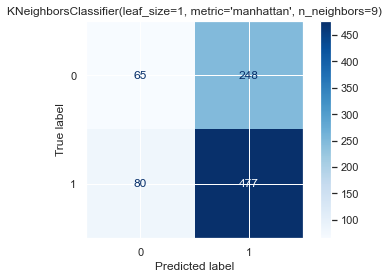

In [175]:
print_metrics(knn_model_4, X_train_scaled, y_train, X_test_scaled, y_test)

In [176]:
knn_4 = add_grid(knn_model_4, X_test_scaled, y_test, dataframe=knn_3, model_name='KNN Model 4')

knn_4

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651
0,KNN Model 4,0.622989,0.657931,0.856373,0.744150


This fourth model appears to be worse than the third model. For now, we will call Log Reg L1 our best model.

## 6. Build a Baseline Decision Tree Model


In [177]:
# Create the model
dtc_baseline_model = DecisionTreeClassifier(random_state=8)

# Fit the model
dtc_baseline_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

Training Precision:  1.0
Testing Precision:  0.69009009009009


Training Recall:  1.0
Testing Recall:  0.6876122082585279


Training Accuracy:  1.0
Testing Accuracy:  0.6022988505747127


Training F1-Score:  1.0
Testing F1-Score:  0.6888489208633093


Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.45      0.45       313
           1       0.69      0.69      0.69       557

    accuracy                           0.60       870
   macro avg       0.57      0.57      0.57       870
weighted avg       0.60      0.60      0.60       870



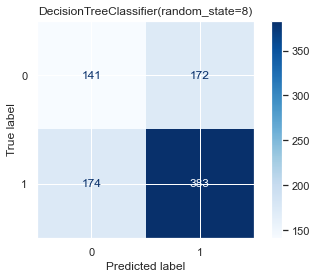

In [178]:
print_metrics(dtc_baseline_model, X_train, y_train, X_test, y_test)

In [189]:
dtc_1 = add_grid(dtc_baseline_model, X_test, y_test, dataframe=knn_4, model_name='Baseline DTC')

dtc_1

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651
0,KNN Model 4,0.622989,0.657931,0.856373,0.744150
0,Baseline DTC,0.602299,0.690090,0.687612,0.688849


This baseline Decision Tree model did decent. We can probably assume that the model is overfitting since we have not 'pruned' it at all. Let's see if we can improve it. This model also did not beat our previous accuracy scores.

## 7. Build Iterative Models to Find the Best Decision Tree Model

In [180]:
# Definite a dtc_param_grid
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                     'max_depth': [1, 5, 10],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 5, 10],
                     'max_features': [1, 3, 5]
                    }

In [181]:
# Instantiate Decision Tree
dtc_1 = DecisionTreeClassifier(random_state=8)

# Instantiate GridSearchCV
dtc_grid_1 = GridSearchCV(dtc_1, dtc_param_grid, scoring='accuracy')

# Fit to the data
dtc_grid_1.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'max_features': [1, 3, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [182]:
# Look at the best parameters from our GridSearchCV
dtc_grid_1.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [183]:
# Instantiate a DecisionTreeClassifier With The Results From Above
dtc_model_1 = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=5, 
                                 min_samples_leaf=10, min_samples_split=2, random_state=8)

dtc_model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=10,
                       random_state=8)

Training Precision:  0.6537267080745341
Testing Precision:  0.6411149825783972


Training Recall:  0.9923394225103123
Testing Recall:  0.9910233393177738


Training Accuracy:  0.6528576908323743
Testing Accuracy:  0.639080459770115


Training F1-Score:  0.7882050081909666
Testing F1-Score:  0.778561354019746


Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.01      0.02       313
           1       0.64      0.99      0.78       557

    accuracy                           0.64       870
   macro avg       0.54      0.50      0.40       870
weighted avg       0.57      0.64      0.51       870



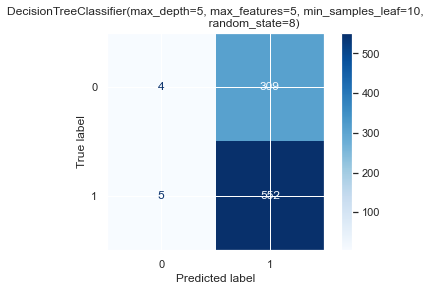

In [184]:
print_metrics(dtc_model_1, X_train, y_train, X_test, y_test)

In [190]:
dtc_2 = add_grid(dtc_model_1, X_test, y_test, dataframe=dtc_1, model_name='DTC Model 2')

dtc_2

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651
0,KNN Model 4,0.622989,0.657931,0.856373,0.744150
0,Baseline DTC,0.602299,0.690090,0.687612,0.688849
0,DTC Model 2,0.639080,0.641115,0.991023,0.778561


This model still hasn't beat our Log Reg L1 model. Let's try one more.

In [191]:
# Definite a dtc_param_grid
dtc_param_grid_2 = {'criterion': ['gini', 'entropy'],
                     'max_depth': [5, 10, 15, 20],
                     'min_samples_split': [5, 10, 15],
                     'min_samples_leaf': [5, 10, 15],
                     'max_features': [5, 7, 9, 10, 11]
                    }

In [192]:
# Instantiate Decision Tree
dtc_model_2 = DecisionTreeClassifier(random_state=8)

# Instantiate GridSearchCV
dtc_grid_2 = GridSearchCV(dtc_model_2, dtc_param_grid_2, scoring='accuracy')

# Fit to the data
dtc_grid_2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             scoring='accuracy')

In [193]:
# Look at the best parameters from our GridSearchCV
dtc_grid_2.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [194]:
# Instantiate a DecisionTreeClassifier With The Results From Above
dtc_model_2 = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=10, 
                                 min_samples_leaf=5, min_samples_split=5, random_state=8)

dtc_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=10, min_samples_leaf=5,
                       min_samples_split=5, random_state=8)

Training Precision:  0.665868263473054
Testing Precision:  0.652744630071599


Training Recall:  0.9829110194460813
Testing Recall:  0.9820466786355476


Training Accuracy:  0.6678174146528577
Testing Accuracy:  0.6540229885057471


Training F1-Score:  0.7939076630176107
Testing F1-Score:  0.7842293906810035


Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.07      0.13       313
           1       0.65      0.98      0.78       557

    accuracy                           0.65       870
   macro avg       0.67      0.53      0.46       870
weighted avg       0.67      0.65      0.55       870



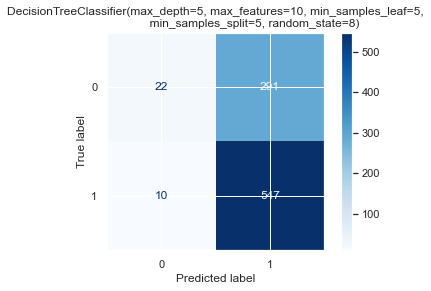

In [195]:
print_metrics(dtc_model_2, X_train, y_train, X_test, y_test)

In [196]:
dtc_3 = add_grid(dtc_model_2, X_test, y_test, dataframe=dtc_2, model_name='DTC Model 3')

dtc_3

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651
0,KNN Model 4,0.622989,0.657931,0.856373,0.744150
0,Baseline DTC,0.602299,0.690090,0.687612,0.688849
0,DTC Model 2,0.639080,0.641115,0.991023,0.778561
0,DTC Model 3,0.654023,0.652745,0.982047,0.784229


This model was our best decision tree to date but still not as good as the logistic regression models. Let's try one final `GridSearchCV`.

In [197]:
# Definite a dtc_param_grid
dtc_param_grid_3 = {'criterion': ['gini', 'entropy'],
                     'max_depth': [9, 12, 15, 18],
                     'min_samples_split': [2, 5, 8, 10],
                     'min_samples_leaf': [8, 9, 10, 11, 12],
                     'max_features': [7, 8, 9, 10, 11]
                    }

In [198]:
# Instantiate Decision Tree
dtc_model_3 = DecisionTreeClassifier(random_state=8)

# Instantiate GridSearchCV
dtc_grid_3 = GridSearchCV(dtc_model_3, dtc_param_grid_3, scoring='accuracy')

# Fit to the data
dtc_grid_3.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 12, 15, 18],
                         'max_features': [7, 8, 9, 10, 11],
                         'min_samples_leaf': [8, 9, 10, 11, 12],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='accuracy')

In [199]:
# Look at the best parameters from our GridSearchCV
dtc_grid_3.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [200]:
# Instantiate a DecisionTreeClassifier With The Results From Above
dtc_model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=10, 
                                 min_samples_leaf=10, min_samples_split=2, random_state=8)

dtc_model_3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=10,
                       min_samples_leaf=10, random_state=8)

Training Precision:  0.6942959001782532
Testing Precision:  0.6706666666666666


Training Recall:  0.9180907483794932
Testing Recall:  0.9030520646319569


Training Accuracy:  0.6835443037974683
Testing Accuracy:  0.6540229885057471


Training F1-Score:  0.7906622684597818
Testing F1-Score:  0.7697016067329763


Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.21      0.30       313
           1       0.67      0.90      0.77       557

    accuracy                           0.65       870
   macro avg       0.61      0.56      0.54       870
weighted avg       0.63      0.65      0.60       870



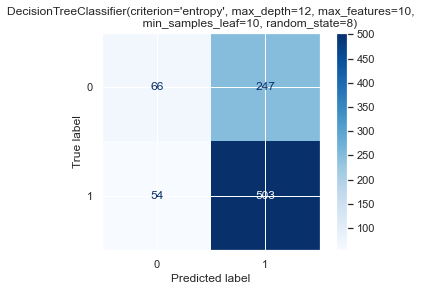

In [201]:
print_metrics(dtc_model_3, X_train, y_train, X_test, y_test)

In [202]:
dtc_4 = add_grid(dtc_model_3, X_test, y_test, dataframe=dtc_3, model_name='DTC Model 4')

dtc_4

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651
0,KNN Model 4,0.622989,0.657931,0.856373,0.744150
0,Baseline DTC,0.602299,0.690090,0.687612,0.688849
0,DTC Model 2,0.639080,0.641115,0.991023,0.778561
0,DTC Model 3,0.654023,0.652745,0.982047,0.784229


Well this is good, but it did not beat our Log Reg still. Moving on...

## 8. Build a Baseline Random Forest Model


In [203]:
# Create the model
rf_baseline_model = RandomForestClassifier(random_state=8)

# Fit the model
rf_baseline_model.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

Training Precision:  1.0
Testing Precision:  0.6909340659340659


Training Recall:  1.0
Testing Recall:  0.9030520646319569


Training Accuracy:  1.0
Testing Accuracy:  0.6793103448275862


Training F1-Score:  1.0
Testing F1-Score:  0.7828793774319066


Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.28      0.39       313
           1       0.69      0.90      0.78       557

    accuracy                           0.68       870
   macro avg       0.66      0.59      0.58       870
weighted avg       0.67      0.68      0.64       870



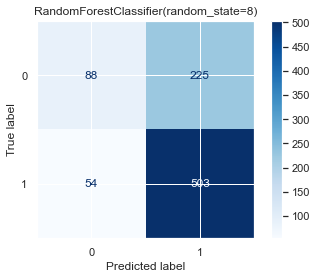

In [204]:
print_metrics(rf_baseline_model, X_train, y_train, X_test, y_test)

In [205]:
rf_1 = add_grid(rf_baseline_model, X_test, y_test, dataframe=dtc_4, model_name='Baseline RF')

rf_1

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651
0,KNN Model 4,0.622989,0.657931,0.856373,0.744150
0,Baseline DTC,0.602299,0.690090,0.687612,0.688849
0,DTC Model 2,0.639080,0.641115,0.991023,0.778561
0,DTC Model 3,0.654023,0.652745,0.982047,0.784229


Wow! The Random Forest baseline model did the best on the testing accuracy. But we are defintely overfitting. Let's try pruning our tree to get a better model.

## 9. Build Iterative Models to Find the Best Random Forest Model

In [206]:
# Definite a rf_param_grid
rf_param_grid_1 = {'criterion': ['gini', 'entropy'],
                   'n_estimators': [50, 100, 150],
                     'max_depth': [1, 5, 10],
                     'min_samples_split': [2, 5, 20],
                     'min_samples_leaf': [1, 5, 10],
                     'max_features': [1, 5, 10]
                    }

In [207]:
# Instantiate Decision Tree
rf_model_1 = RandomForestClassifier(random_state=8)

# Instantiate GridSearchCV
rf_grid_1 = GridSearchCV(rf_model_1, rf_param_grid_1, scoring='accuracy')

# Fit to the data
rf_grid_1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'max_features': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [208]:
# Look at the best parameters from our GridSearchCV
rf_grid_1.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [209]:
# Instantiate a RandomForestClassifier With The Results From Above
rf_model_1 = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=10, 
                                 min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=8)

rf_model_1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=10,
                       min_samples_split=5, n_estimators=50, random_state=8)

Training Precision:  0.6737220447284346
Testing Precision:  0.6497041420118344


Training Recall:  0.9941072480848556
Testing Recall:  0.9856373429084381


Training Accuracy:  0.682777138473341
Testing Accuracy:  0.6505747126436782


Training F1-Score:  0.8031421090216615
Testing F1-Score:  0.783166904422254


Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.05      0.10       313
           1       0.65      0.99      0.78       557

    accuracy                           0.65       870
   macro avg       0.66      0.52      0.44       870
weighted avg       0.66      0.65      0.54       870



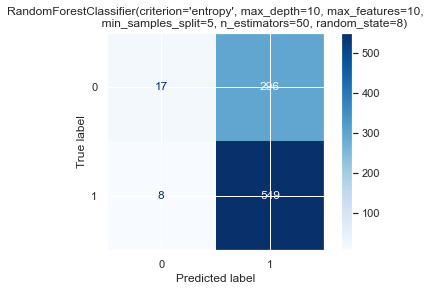

In [210]:
print_metrics(rf_model_1, X_train, y_train, X_test, y_test)

In [211]:
rf_2 = add_grid(rf_model_1, X_test, y_test, dataframe=rf_1, model_name='RF Model 2')

rf_2

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651
0,KNN Model 4,0.622989,0.657931,0.856373,0.744150
0,Baseline DTC,0.602299,0.690090,0.687612,0.688849
0,DTC Model 2,0.639080,0.641115,0.991023,0.778561
0,DTC Model 3,0.654023,0.652745,0.982047,0.784229


Shoot, this model did worse than our baseline random forest. Let's try one last test.

In [212]:
# Definite a rf_param_grid
rf_param_grid_2 = {'criterion': ['gini', 'entropy'],
                   'n_estimators': [10, 25, 50],
                     'max_depth': [5, 10, 15],
                     'min_samples_split': [2, 5, 9],
                     'min_samples_leaf': [1, 3, 5],
                     'max_features': [3, 7, 9]
                    }

In [213]:
# Instantiate Decision Tree
rf_model_2 = RandomForestClassifier(random_state=8)

# Instantiate GridSearchCV
rf_grid_2 = GridSearchCV(rf_model_2, rf_param_grid_2, scoring='accuracy')

# Fit to the data
rf_grid_2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [3, 7, 9],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 9],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy')

In [214]:
# Look at the best parameters from our GridSearchCV
rf_grid_2.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [215]:
# Instantiate a RandomForestClassifier With The Results From Above
rf_model_2 = RandomForestClassifier(criterion='gini', max_depth=15, max_features=9, 
                                 min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=8)

# Fit the model
rf_model_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=9, n_estimators=50,
                       random_state=8)

Training Precision:  0.7185908319185059
Testing Precision:  0.6570048309178744


Training Recall:  0.9976428992339422
Testing Recall:  0.9766606822262118


Training Accuracy:  0.744150364403529
Testing Accuracy:  0.6586206896551724


Training F1-Score:  0.8354305452751047
Testing F1-Score:  0.7855595667870036


Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.09      0.16       313
           1       0.66      0.98      0.79       557

    accuracy                           0.66       870
   macro avg       0.67      0.53      0.47       870
weighted avg       0.67      0.66      0.56       870



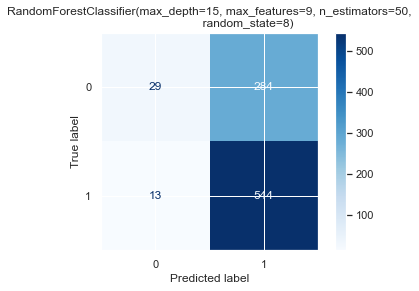

In [216]:
print_metrics(rf_model_2, X_train, y_train, X_test, y_test)

In [217]:
rf_3 = add_grid(rf_model_2, X_test, y_test, dataframe=rf_2, model_name='RF Model 3')

rf_3

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.674713,0.700880,0.858169,0.771590
0,Log Reg L1,0.678161,0.703976,0.858169,0.773463
0,Log Reg L2,0.674713,0.700880,0.858169,0.771590
0,Baseline KNN,0.626437,0.665714,0.836625,0.741448
0,KNN Model 2,0.651724,0.650831,0.983842,0.783417
0,KNN Model 3,0.647126,0.662338,0.915619,0.768651
0,KNN Model 4,0.622989,0.657931,0.856373,0.744150
0,Baseline DTC,0.602299,0.690090,0.687612,0.688849
0,DTC Model 2,0.639080,0.641115,0.991023,0.778561
0,DTC Model 3,0.654023,0.652745,0.982047,0.784229


Although our baseline random forest model had the best accuracy, it is overfitting so we will call the Log Reg L1 our best model.

## 10. Choose and Evaluate an Overall Best Model
Preprocess the full training set and test set appropriately, then evaluate the final model with various classification metrics in addition to log loss.

In [226]:
# Instantiate a Logistic Regression With The Results From Above
final_model = LogisticRegression(penalty='l1', max_iter=1000, C=1, solver='liblinear', tol=0.001, random_state=8)

final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=8,
                   solver='liblinear', tol=0.001)

Training Precision:  0.7597567156614293
Testing Precision:  0.7039764359351989


Training Recall:  0.8833235120801414
Testing Recall:  0.8581687612208259


Training Accuracy:  0.7422324510932106
Testing Accuracy:  0.6781609195402298


Training F1-Score:  0.8168937329700271
Testing F1-Score:  0.7734627831715211


Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.36      0.44       313
           1       0.70      0.86      0.77       557

    accuracy                           0.68       870
   macro avg       0.65      0.61      0.61       870
weighted avg       0.66      0.68      0.66       870



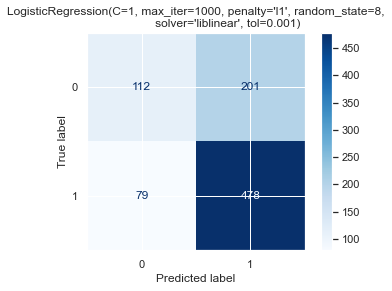

In [230]:
print_metrics(final_model, X_train_scaled, y_train, X_test_scaled, y_test)

This model has 67.8% accuracy which means that it correctly predicts that a player was drafted 67.8% of the time. This is a slight improvement over the "dummy" model which would have an accuracy of about 64.8%.

Our precision percentage helps answer the question: 

> "Out of all the times the model said someone was drafted to the NFL, how many times was the player actually drafted to the NFL?"

While our recall percentage helps answer the question:

> "Out of all the players we saw that actually were drafted, what percentage of them did our model correctly identify as being drafted?"

Lastly, our F-1 score is the harmonic mean between precision and recall. Given that we did not care more about precision or recall, the F-1 score is the best way to evaluate how our model did. In this case we saw a model that had an F-1 score of 0.78556.

## Conclusion

In conclusion, it is very hard to predict whether a player will be drafted based purely on their combine stats. This makes sense for a few intuitive reasons:

1. There is a lot more that goes into whether a player is drafted than purely their physical attributes. For example, a wide reciever can run extremely fast and be extremely agile, but if they can't catch the ball or run the right routes, they will not be drafted.
2. Every position in football is extremely different. Some positions require physical strength while others require more mental ability. Without having mental testing regulations on hand, it is hard to say how someone will perform.
3. The combine invites only the best of the best, meaning that all of these players were the best at their position in college. Sometimes the gap between people is extremely marginal.

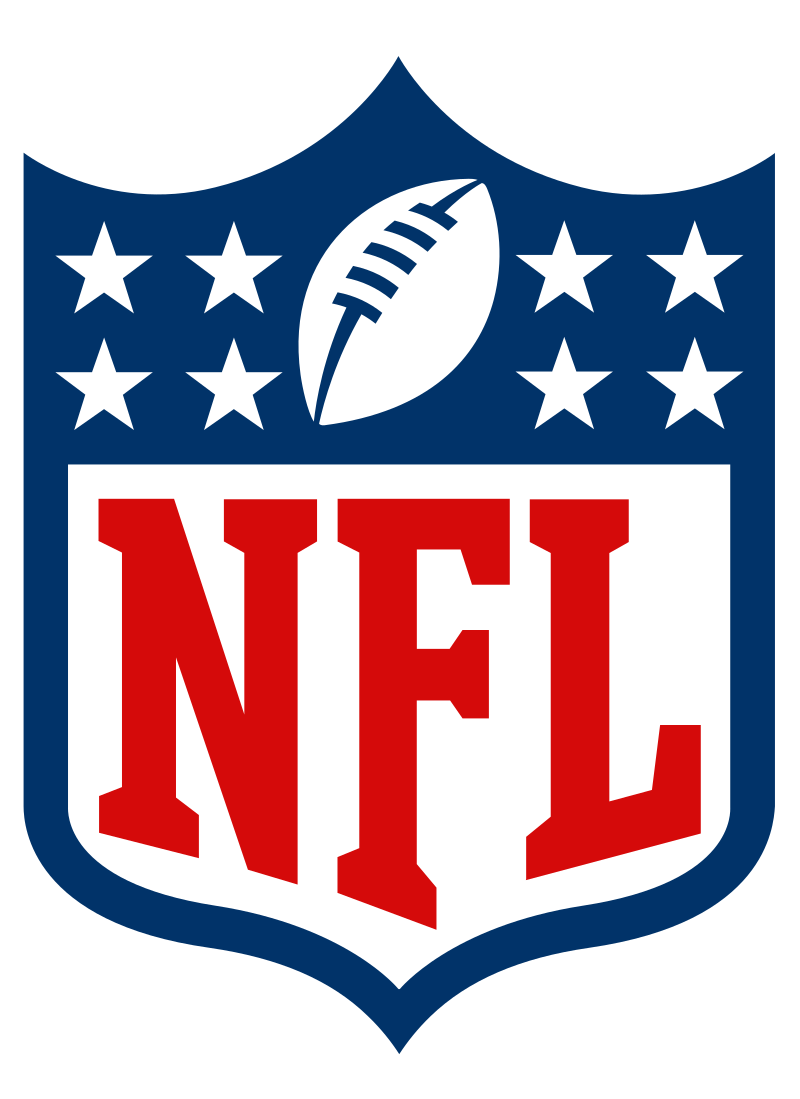